In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import sys
import cv2
import serial.tools.list_ports
import serial
import time
import random
import statistics
import matplotlib.patches as mpatches
import statsmodels.api as sm

In [2]:
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras import utils, optimizers
from tensorflow import lite

from locale import normalize

In [3]:
Folderbydata = 'Recoleccion1_Conversion'  
files = os.listdir( Folderbydata )

corte = 5 # corte de 5 primeros samples

In [4]:
datosmaximosenbase = []
alldatos =[]
rmsdatos=[]
RMSdatos=[]

for file in files:
    data = []
    csv = open(Folderbydata +'/'+file, "r")
    try:
        data = [int(element) for element in csv.read().splitlines()]
    except (ValueError, TypeError):
        #data = []
        for row in open(Folderbydata+'/'+file, "r"):
            #print(row)
            try:
                int(row)
            except (ValueError, TypeError):
                #print('dato'+row)
                #break
                row = 0
            finally:
                row = int(row)
                data.append(row)
    #print(data)
    # pregunto si el archivo tiene datos
    if len(data) > 0:
        data = [data[x] for x in range(0,len(data)) if x >= corte]# cambia el tamaño de la lista cortando los primeros 5 elementos
        if (file.split('.')[0].split('_')[1].startswith('B')):
            datosmaximosenbase.append(max(data))
        else:
            pass
        alldatos.append(data)
        rmsdatos.append(np.mean(data))
        RMSdatos.append(np.sqrt(np.mean(np.square(data))))
    else:
        print('El archivo '+file+' tiene problemas')

    csv.close()

print(datosmaximosenbase)
prombase = statistics.mean(datosmaximosenbase)
print(prombase)

[1839, 1848, 1874, 1833, 1812, 1837, 1809, 1803, 1798, 1806, 1838, 1859, 1856, 1875, 1832, 1840, 1823, 1838, 1833, 1853, 1825, 1826, 1815, 1846, 1816, 1813, 1816, 1844, 1769, 1811, 1832, 1847, 1838, 1790, 1843, 1806, 1772, 1766, 1759, 1757, 1759, 1765, 1765, 1754, 1758, 1837, 1754, 1761, 1753, 1760, 1763, 1780, 1762, 1789, 1780, 1778, 1831, 1780, 1785, 1787, 1852, 1798, 1798, 1786, 1788, 1785, 1784, 1841, 1788, 1770, 1766, 1768, 1762, 1847, 1864]
1805.2666666666667


In [5]:
#normalizacion de los datos
for x in range(0,len(alldatos)):
    for y in range(0,len(alldatos[x])):
        if alldatos[x][y] == 0:
            alldatos[x][y] = prombase
        alldatos[x][y] = alldatos[x][y]/prombase

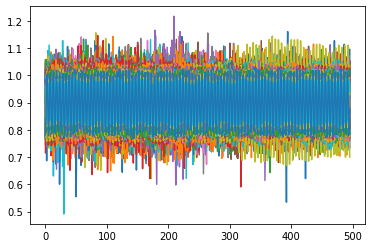

In [6]:
# grafica de los datos
for x in range(0,len(alldatos)):
    plt.plot(alldatos[x])
plt.show()

In [15]:
datosinput = np.array(alldatos)
datosrms = np.array(rmsdatos)
datosRMS = np.array(RMSdatos)

#datosinput
datosinput.shape
#datosrms
datosrms.shape
#datosRMS
datosRMS.shape

(601,)

In [19]:
allresults = []
tareasSTR = []
#########
# Down                  High 
#0     H                #66.6  L
#16.6  N    #50  B      #83.3  N
#33.3  L                #100   H
#########
for x in range(0,len(files)):
    text = files[x].split("_")[1]
    if text.startswith('B'):
        allresults.append(50)
        tareasSTR.append('Base')
    else :
        #print(text[len(text)-2:])
        # switch case
        if text[len(text)-2:] == "UH":
            allresults.append(100)
            tareasSTR.append('UP High')
        elif text[len(text)-2:] == "UN":
            allresults.append(83.3)
            tareasSTR.append('UP Normal')
        elif text[len(text)-2:] == "UL":
            allresults.append(66.6)
            tareasSTR.append('UP Low')
        elif text[len(text)-2:] == "DL":
            allresults.append(33.3)
            tareasSTR.append('DOWN Low')
        elif text[len(text)-2:] == "DN":
            allresults.append(16.6)
            tareasSTR.append('DOWN Normal')
        elif text[len(text)-2:] == "DH":
            allresults.append(0)
            tareasSTR.append('DOWN High')
# corte de los datos para el entrenamiento

#datosoutput = [allresults[x] for x in range(0,len(allresults)) if x >= corte]
#tareasSTR = [tareasSTR[x] for x in range(0,len(tareasSTR)) if x >= corte]

datosoutput = np.array(allresults)
datosoutput.shape
tareasSTR = np.array(tareasSTR)
tareasSTR.shape 

(601,)

In [20]:
datosoutput.shape
tareasSTR.shape

(601,)

In [21]:
# datos de entrenamiento
x_train, x_test, y_train, y_test = train_test_split(datosinput, datosoutput, test_size=0.2)
x_train_rms, x_test_rms, y_train_rms, y_test_rms = train_test_split(datosrms, datosoutput, test_size=0.2)
x_train_RMS, x_test_RMS, y_train_RMS, y_test_RMS = train_test_split(datosRMS, datosoutput, test_size=0.2)
# change datosoutput to tareasSTR
#x_train, x_test, y_train, y_test = train_test_split(datosinput, tareasSTR, test_size=0.2)
#x_train_rms, x_test_rms, y_train_rms, y_test_rms = train_test_split(datosrms, tareasSTR, test_size=0.2)
#x_train_RMS, x_test_RMS, y_train_RMS, y_test_RMS = train_test_split(datosRMS, tareasSTR, test_size=0.2)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(x_train_rms.shape)
print(x_test_rms.shape)
print(y_train_rms.shape)
print(y_test_rms.shape)

print(x_train_RMS.shape)
print(x_test_RMS.shape)
print(y_train_RMS.shape)
print(y_test_RMS.shape)

(480, 496)
(121, 496)
(480,)
(121,)
(480,)
(121,)
(480,)
(121,)
(480,)
(121,)
(480,)
(121,)


In [22]:
#x_train
#y_train
#x_test
#y_test
#x_train_rms
#y_train_rms
#x_test_rms
#y_test_rms
#x_train_RMS
#y_train_RMS
#x_test_RMS
#y_test_RMS


Activation layers   https://keras.io/api/layers/activation_layers/
ReLU layer                  https://keras.io/api/layers/activation_layers/relu/
Softmax layer               https://keras.io/api/layers/activation_layers/softmax/
LeakyReLU layer
PReLU layer
ELU layer
ThresholdedReLU layer


Available optimizers: https://keras.io/optimizers/ 
SGD
RMSprop
Adam                        https://keras.io/api/optimizers/adam/
Adadelta
Adagrad
Adamax
Nadam
Ftrl


In [23]:
# define the model architecture all data
inputlayer = tf.keras.layers.Dense(units=1, input_shape=(x_train.shape[1],), activation='relu') 
#oculta2 = tf.keras.layers.Dense(units=500, activation='relu')#datosinput.shape[0]
oculta = tf.keras.layers.Dense(units=7, activation='softmax') 
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([inputlayer, oculta, salida])

In [24]:
# define the model rms
inputlayer_rms = tf.keras.layers.Dense(units=1, input_shape=[1], activation='relu')
#oculta2 = tf.keras.layers.Dense(units=500, activation='relu')#datosinput.shape[0]
oculta_rms = tf.keras.layers.Dense(units=7, activation='softmax')
salida_rms = tf.keras.layers.Dense(units=1)
modelo_rms = tf.keras.Sequential([inputlayer_rms, oculta_rms, salida_rms])

In [25]:
# define the model RMS
inputlayer_RMS = tf.keras.layers.Dense(units=1, input_shape=[1], activation='relu')
#oculta2 = tf.keras.layers.Dense(units=500, activation='relu')#datosinput.shape[0]
oculta_RMS = tf.keras.layers.Dense(units=7, activation='softmax')
salida_RMS = tf.keras.layers.Dense(units=1)
modelo_RMS = tf.keras.Sequential([inputlayer_RMS, oculta_RMS, salida_RMS])

LOSSES 
https://keras.io/api/losses/

    https://keras.io/api/losses/probabilistic_losses/#categorical_crossentropy-function

Metrics
https://keras.io/metrics/

    https://keras.io/api/metrics/accuracy_metrics/#accuracy-class

In [26]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    #loss='mean_squared_error',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

modelo_rms.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    #loss='mean_squared_error',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

modelo_RMS.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    #loss='mean_squared_error',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [27]:
print("Comenzando entrenamiento...")
historial = modelo.fit(x_train, y_train, epochs=1000,verbose=1 )#
print("Modelo entrenado!")


Comenzando entrenamiento...
Epoch 1/1000
15/15 [==============================] - 0s 1ms/step - loss: 5.9240e-06 - accuracy: 0.1542
Epoch 2/1000
15/15 [==============================] - 0s 1ms/step - loss: 5.9240e-06 - accuracy: 0.1542
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 5.9240e-06 - accuracy: 0.1542
Epoch 4/1000
15/15 [==============================] - 0s 1ms/step - loss: 5.9240e-06 - accuracy: 0.1542
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 5.9240e-06 - accuracy: 0.1542
Epoch 6/1000
15/15 [==============================] - 0s 1ms/step - loss: 5.9240e-06 - accuracy: 0.1542
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 5.9240e-06 - accuracy: 0.1542
Epoch 8/1000
15/15 [==============================] - 0s 1ms/step - loss: 5.9240e-06 - accuracy: 0.1542
Epoch 9/1000
15/15 [==============================] - 0s 1ms/step - loss: 5.9240e-06 - accuracy: 0.1542
Epoch 10/1000
15/15 [===============

In [28]:

print("Comenzando entrenamiento de rms...")
historial_rms = modelo_rms.fit(x_train_rms, y_train_rms, epochs=1000,verbose=1 )#
print("Modelo entrenado!")

Comenzando entrenamiento de rms...
Epoch 1/1000
15/15 [==============================] - 0s 1ms/step - loss: 6.0400e-06 - accuracy: 0.1562
Epoch 2/1000
15/15 [==============================] - 0s 1ms/step - loss: 6.0400e-06 - accuracy: 0.1562
Epoch 3/1000
15/15 [==============================] - 0s 1ms/step - loss: 6.0400e-06 - accuracy: 0.1562
Epoch 4/1000
15/15 [==============================] - 0s 1ms/step - loss: 6.0400e-06 - accuracy: 0.1562
Epoch 5/1000
15/15 [==============================] - 0s 1ms/step - loss: 6.0400e-06 - accuracy: 0.1562
Epoch 6/1000
15/15 [==============================] - 0s 1ms/step - loss: 6.0400e-06 - accuracy: 0.1562
Epoch 7/1000
15/15 [==============================] - 0s 1ms/step - loss: 6.0400e-06 - accuracy: 0.1562
Epoch 8/1000
15/15 [==============================] - 0s 1ms/step - loss: 6.0400e-06 - accuracy: 0.1562
Epoch 9/1000
15/15 [==============================] - 0s 1ms/step - loss: 6.0400e-06 - accuracy: 0.1562
Epoch 10/1000
15/15 [========

In [29]:
print("Comenzando entrenamiento de RMS...")
historial_RMS = modelo_RMS.fit(x_train_RMS, y_train_RMS, epochs=1000,verbose=1 )# 
print("Modelo entrenado!")

Comenzando entrenamiento de RMS...
Epoch 1/1000
15/15 [==============================] - 0s 1ms/step - loss: 5.9861e-06 - accuracy: 0.1458
Epoch 2/1000
15/15 [==============================] - 0s 1ms/step - loss: 5.9861e-06 - accuracy: 0.1458
Epoch 3/1000
15/15 [==============================] - 0s 1ms/step - loss: 5.9861e-06 - accuracy: 0.1458
Epoch 4/1000
15/15 [==============================] - 0s 1ms/step - loss: 5.9861e-06 - accuracy: 0.1458
Epoch 5/1000
15/15 [==============================] - 0s 1ms/step - loss: 5.9861e-06 - accuracy: 0.1458
Epoch 6/1000
15/15 [==============================] - 0s 1ms/step - loss: 5.9861e-06 - accuracy: 0.1458
Epoch 7/1000
15/15 [==============================] - 0s 1ms/step - loss: 5.9861e-06 - accuracy: 0.1458
Epoch 8/1000
15/15 [==============================] - 0s 1ms/step - loss: 5.9861e-06 - accuracy: 0.1458
Epoch 9/1000
15/15 [==============================] - 0s 1ms/step - loss: 5.9861e-06 - accuracy: 0.1458
Epoch 10/1000
15/15 [========

In [30]:

test_results = modelo.evaluate(x_test, y_test, verbose=1)
test_results
test_results_rms = modelo_rms.evaluate(x_test_rms, y_test_rms, verbose=1)
test_results_rms
test_results_RMS = modelo_RMS.evaluate(x_test_RMS, y_test_RMS, verbose=1)
test_results_RMS


4/4 [==============================] - 0s 1ms/step - loss: 5.9079e-06 - accuracy: 0.1570


[5.907855666009709e-06, 0.1570248007774353]

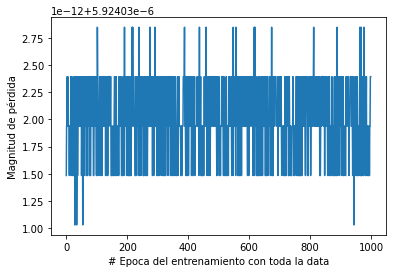

In [31]:

plt.xlabel("# Epoca del entrenamiento con toda la data")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history['loss'])


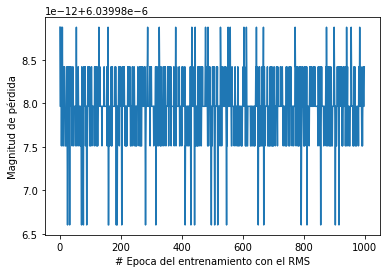

In [32]:

plt.xlabel("# Epoca del entrenamiento con el RMS")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial_rms.history['loss'])

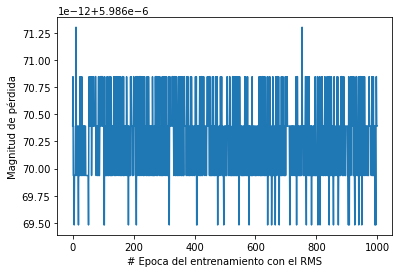

In [33]:
plt.xlabel("# Epoca del entrenamiento con el RMS")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial_RMS.history['loss'])

In [34]:
print("Variables internas del modelo con toda la data")
print(inputlayer.get_weights())
print(oculta.get_weights())
print(salida.get_weights())

print("Variables internas del modelo con el RMS")
print(inputlayer_rms.get_weights())
print(oculta_rms.get_weights())
print(salida_rms.get_weights())

print("Variables internas del modelo con el RMS")
print(inputlayer_RMS.get_weights())
print(oculta_RMS.get_weights())
print(salida_RMS.get_weights())


Variables internas del modelo con toda la data
[array([[-0.06151656],
       [-0.08805121],
       [ 0.01897746],
       [ 0.08612414],
       [ 0.04660278],
       [-0.03185499],
       [ 0.04789602],
       [ 0.09383316],
       [ 0.01740203],
       [-0.03747975],
       [-0.07969153],
       [-0.09748445],
       [ 0.01546996],
       [-0.00595706],
       [-0.03556845],
       [ 0.10517522],
       [ 0.09723593],
       [ 0.09436918],
       [-0.01605282],
       [ 0.03915701],
       [-0.03124845],
       [-0.1009457 ],
       [-0.08395775],
       [-0.03116428],
       [ 0.0408617 ],
       [-0.10283033],
       [-0.04836792],
       [-0.00936499],
       [-0.01563067],
       [ 0.09474564],
       [ 0.08514114],
       [ 0.08924762],
       [-0.10267789],
       [-0.04348758],
       [ 0.00684091],
       [ 0.10929184],
       [-0.01853493],
       [ 0.04816305],
       [-0.09809052],
       [-0.0588063 ],
       [ 0.02537956],
       [ 0.04320244],
       [-0.09499584],
      